In [1]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import confusion_matrix

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from utils.rw_processed_data import load_processed_data


In [3]:
data = load_processed_data(folder_name='OMNI', name='full_data')

In [4]:
data.drop(data[data['Dst_index'] == 999.9].index, inplace=True)
data.drop(data[data['B_scalar'] == 999.9].index, inplace=True)
data.drop(data[data['Bz_GSM'] == 999.9].index, inplace=True)
data.drop(data[data['Dst_index'] == 999.9].index, inplace=True)

In [5]:
filter_data = data.copy()

In [6]:
def class_count(df):
    count = {"fraca": 0, "moderada": 0, "intensa": 0, "super_intensa": 0}
    for i in range(1, len(df)):
        count[df['classification'].iloc[i]]+=1
    print(count)

class_count(data)


{'fraca': 2241, 'moderada': 1105, 'intensa': 216, 'super_intensa': 15}


In [7]:
filter_data


,date,Dst_index,Kp_index,B_scalar,Bz_GSM,classification
6,2001-06-07,-36.0,57.0,12.5,-6.1,fraca
11,2001-06-12,-61.0,53.0,19.3,-11.8,moderada
17,2001-06-18,-33.0,57.0,8.4,-4.1,fraca
26,2001-06-27,-46.0,37.0,16.3,-7.1,fraca
61,1981-09-01,-38.0,43.0,9.9,-5.9,fraca
...,...,...,...,...,...,...
21176,1996-09-22,-37.0,27.0,7.5,-3.2,fraca
21177,1996-09-23,-42.0,50.0,12.2,-7.5,fraca
21180,1996-09-26,-38.0,50.0,9.3,-5.7,fraca
21183,1996-09-29,-42.0,43.0,9.7,-4.8,fraca


In [8]:
le = LabelEncoder()

filter_data['classification'] = le.fit_transform(filter_data['classification'])

In [9]:
X = filter_data[['Dst_index', 'Kp_index', 'Bz_GSM']].copy()
y = filter_data['classification']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# clf = NuSVC()
# clf = SVC(kernel='poly', degree=10) # 17
# clf = SVC(decision_function_shape='ovo') # 3 
clf = SVC(kernel='linear') # 2 [Classificação de Vetores de Suporte (SVC)]
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
clf.support_vectors_

In [ ]:
clf.coef_

In [ ]:
clf.intercept_

In [13]:
def linear_regression_line(ax, x_linear, y_linear):
    from sklearn.linear_model import LinearRegression

    # obtain linear regression line
    # x_linear = np.array([-101., -101., -100., -100., -99.])
    # y_linear = np.array([63., 47., 47., 60., 70.])
    # m, b = np.polyfit(x_linear, y_linear, 1)

    model = LinearRegression()
    model.fit(x_linear.reshape(-1, 1), y_linear.reshape(-1, 1))
    _ = model.predict(x_linear.reshape(-1, 1))
    # ax1.plot(x_linear, y_linear_predict, color='red', linestyle='--')

    ex_x = np.linspace(x_linear.min(), x_linear.max(), 10).reshape(-1, 1)
    ex_pred = model.predict(ex_x)
    ax.plot(ex_x, ex_pred, color='orangered', linestyle='dotted', linewidth=1.0)

In [14]:
classification_rules = {
    'fraca':            np.array(range(-31, -51, -1)),
    'moderada':         np.array(range(-51, -101, -1)),
    'intensa':          np.array(range(-101, -251, -1)),
    'super_intensa':    np.array(range(-251, -1001, -1)),
}

In [15]:
dst_support_vetors = clf.support_vectors_[:, 0:2]
dst_support_vetors_fraca_moderada = dst_support_vetors[(dst_support_vetors[:, 0] <= -31) & (dst_support_vetors[:, 0] > (-51 + (-101))/2)]
dst_support_vetors_moderada_intensa = dst_support_vetors[(dst_support_vetors[:, 0] <= (-51 + (-101))/2) & (dst_support_vetors[:, 0] > (-101 + (-251))/2)]
dst_support_vetors_intensa_super_intensa = dst_support_vetors[(dst_support_vetors[:, 0] <= (-101 + (-251))/2) & (dst_support_vetors[:, 0] > -1001)]

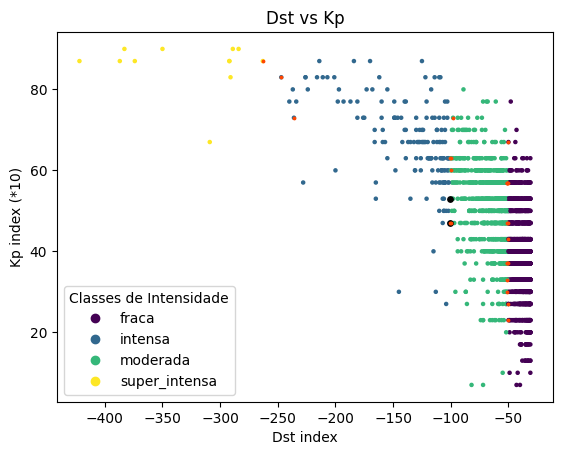

In [16]:
fig1, ax1 = plt.subplots()

scatter = ax1.scatter(
    x=X_train['Dst_index'],
    y=X_train['Kp_index'],
    s=5,
    c=y_train,
)


# outliers
x_outliers = [-101.0, -101.0]
y_outliers = [53.0, 47.0]

ax1.scatter(
    x=x_outliers,
    y=y_outliers,
    s=15,
    c='black',
)


# pontos para vetores de suporte
ax1.scatter(
    x=clf.support_vectors_[:, 0], # dst
    y=clf.support_vectors_[:, 1], # kp
    s=3,
    c='orangered',
)

# legenda com base nas classes
legend1 = ax1.legend(
    scatter.legend_elements()[0],
    ["fraca", "intensa", "moderada", "super_intensa"],
    loc="lower left",
    title="Classes de Intensidade",
)

ax1.set_title('Dst vs Kp')
ax1.set_xlabel('Dst index')
ax1.set_ylabel('Kp index (*10)')

"""
0: fraca
1: intensa
2: moderada
3: super_intensa
"""


# x_linear = dst_support_vetors_moderada_intensa[:,0]
# y_linear = dst_support_vetors_moderada_intensa[:,1]
# _ = linear_regression_line(ax1, x_linear, y_linear)

# x_linear = dst_support_vetors_intensa_super_intensa[:,0]
# y_linear = dst_support_vetors_intensa_super_intensa[:,1]
# _ = linear_regression_line(ax1, x_linear, y_linear)

# x_linear = dst_support_vetors_fraca_moderada[:,0]
# y_linear = dst_support_vetors_fraca_moderada[:,1]
# _ = linear_regression_line(ax1, x_linear, y_linear)


plt.show()

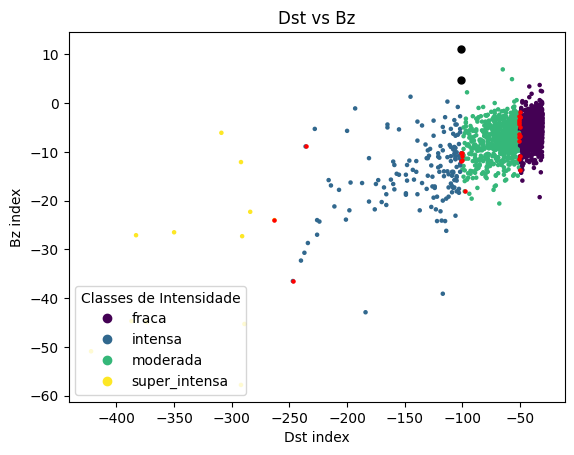

In [17]:
fig1, ax1 = plt.subplots()

scatter = ax1.scatter(
    x=X_train['Dst_index'],
    y=X_train['Bz_GSM'],
    c=y_train,
    s=5,
)

# outliers
x_outliers = [-101.0, -101.0]
y_outliers = [11.1, 4.7]
ax1.scatter(
    x=x_outliers,
    y=y_outliers,
    s=25,
    c='black',
)

# pontos para vetores de suporte
ax1.scatter(
    x=clf.support_vectors_[:, 0],
    y=clf.support_vectors_[:, 2],
    c='r',
    s=5,
)

# legenda com base nas classes
legend1 = ax1.legend(
    scatter.legend_elements()[0],
    ["fraca", "intensa", "moderada", "super_intensa"],
    loc="lower left",
    title="Classes de Intensidade",
)

ax1.set_title('Dst vs Bz')
ax1.set_xlabel('Dst index')
ax1.set_ylabel('Bz index')

plt.show()

In [17]:
y_predict = clf.predict(X_test)

In [31]:
y_predict

array([2, 2, 0, ..., 0, 2, 0])

In [32]:
X_test

,Dst_index,Kp_index,Bz_GSM
5480,-64.0,50.0,-9.2
16340,-71.0,50.0,-7.1
8317,-41.0,7.0,1.0
2985,-32.0,40.0,-2.7
8601,-58.0,43.0,-7.9
...,...,...,...
7782,-67.0,57.0,-6.6
19668,-37.0,40.0,-3.7
4030,-40.0,30.0,-2.4
17647,-74.0,43.0,-4.0


In [18]:
np.where(y_test != y_predict)[0]

array([], dtype=int64)

In [19]:
(y_test != y_predict).index[np.where(y_test != y_predict)[0]]

Index([], dtype='int64')

In [20]:
# indetificar outliers
filter_data.filter(items=(y_test != y_predict).index[np.where(y_test != y_predict)[0]], axis=0)


,date,Dst_index,Kp_index,B_scalar,Bz_GSM,classification


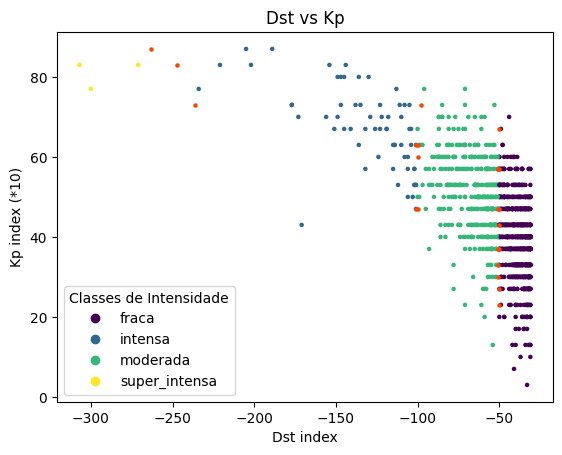

In [24]:
fig1, ax1 = plt.subplots()

scatter = ax1.scatter(
    x=X_test['Dst_index'],
    y=X_test['Kp_index'],
    s=5,
    c=y_test,
)


# outliers
outliers_storms = filter_data.filter(items=(y_test != y_predict).index[np.where(y_test != y_predict)[0]], axis=0)
x_outliers = outliers_storms['Dst_index'].to_list()
y_outliers = outliers_storms['Kp_index'].to_list()

ax1.scatter(
    x=x_outliers,
    y=y_outliers,
    s=15,
    c='black',
)


# pontos para vetores de suporte
ax1.scatter(
    x=clf.support_vectors_[:, 0], # dst
    y=clf.support_vectors_[:, 1], # kp
    s=5,
    c='orangered',
)

# legenda com base nas classes
legend1 = ax1.legend(
    scatter.legend_elements()[0],
    ["fraca", "intensa", "moderada", "super_intensa"],
    loc="lower left",
    title="Classes de Intensidade",
)

ax1.set_title('Dst vs Kp')
ax1.set_xlabel('Dst index')
ax1.set_ylabel('Kp index (*10)')

plt.show()

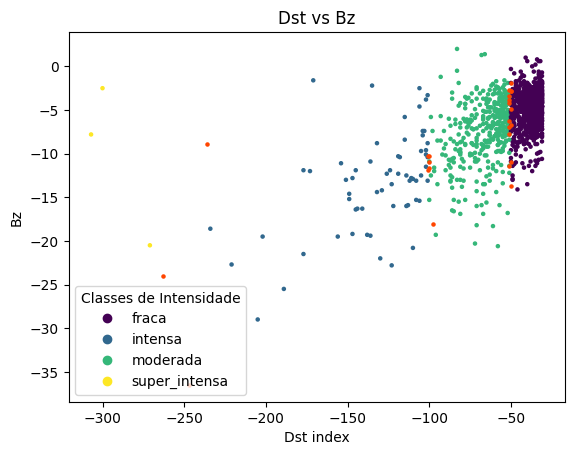

In [25]:
fig1, ax1 = plt.subplots()

scatter = ax1.scatter(
    x=X_test['Dst_index'],
    y=X_test['Bz_GSM'],
    c=y_test,
    s=5,
)

# outliers
outliers_storms = filter_data.filter(items=(y_test != y_predict).index[np.where(y_test != y_predict)[0]], axis=0)
x_outliers = outliers_storms['Dst_index'].to_list()
y_outliers = outliers_storms['Bz_GSM'].to_list()

ax1.scatter(
    x=x_outliers,
    y=y_outliers,
    s=25,
    c='black',
)

# pontos para vetores de suporte
ax1.scatter(
    x=clf.support_vectors_[:, 0],
    y=clf.support_vectors_[:, 2],
    c='orangered',
    s=5,
)

# legenda com base nas classes
legend1 = ax1.legend(
    scatter.legend_elements()[0],
    ["fraca", "intensa", "moderada", "super_intensa"],
    loc="lower left",
    title="Classes de Intensidade",
)

ax1.set_title('Dst vs Bz')
ax1.set_xlabel('Dst index')
ax1.set_ylabel('Bz')

plt.show()

In [26]:
matrix_data = confusion_matrix(y_test, y_predict)

In [27]:
def plot_confusion_matrix(matrix_data):  
    fig, ax = plt.subplots()
    sns.heatmap(
        matrix_data, 
        annot=True, 
        ax=ax, 
        fmt='d', 
        cmap='Reds',
        cbar=False,
        xticklabels=le.classes_,
        yticklabels=le.classes_
    )

    ax.set_title("Matriz de Confusão", fontsize=16)
    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")

    plt.tight_layout()

In [28]:
[print(f'{i}: {v}') for i, v in enumerate(le.classes_)]

0: fraca
1: intensa
2: moderada
3: super_intensa


[None, None, None, None]

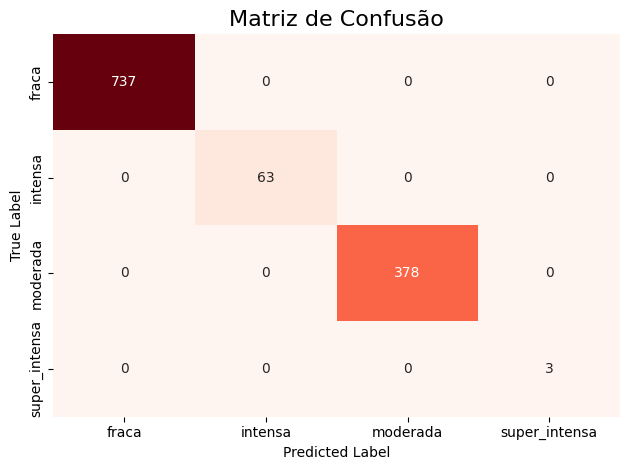

In [29]:
plot_confusion_matrix(matrix_data)

In [30]:
from sklearn.metrics import classification_report
report = classification_report(y_true=y_test, y_pred=y_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       737
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00       378
           3       1.00      1.00      1.00         3

    accuracy                           1.00      1181
   macro avg       1.00      1.00      1.00      1181
weighted avg       1.00      1.00      1.00      1181

